In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Open the original CSV as it was download from MYCV

In [4]:
original = pd.read_csv('./data/grants.csv')
original.head()

,ID,Grant type,Reporting date 1,Reporting date 2,Abstract,Institution,Total Anticipated Amount OR Total Requested Amount currency,Total Anticipated Amount OR Total Requested Amount amount,Proposal Submission Date,Department,...,Prime Sponsor Name,Prime Sponsor Type.1,Activity Type.2,Prime Sponsor Type.2,Sponsor Type.2,Status.2,Proposal Type,Proposal Type OR Award Type,Proprietary ID,Source
0,257810,BU Grant,01/04/2017,31/03/2021,NaN,"Boston University, Boston, MA, United States",USD,422926.0,NaN,ENG CTR FOR INFO & SYS ENG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grant,00000000000050205324-N-ZKC_AWRD,Institutional Grants System
1,257856,BU Grant,01/03/2017,30/06/2017,NaN,"Boston University, Boston, MA, United States",USD,5000.0,NaN,ENG ELECTRICAL & COMPUTER ENG,...,Harvard University,University,NaN,NaN,NaN,NaN,NaN,Sub-award - Grant,00000000000055205431-N-ZKC_AWRD,Institutional Grants System
2,257904,BU Grant,05/01/2017,31/01/2018,NaN,"Boston University, Boston, MA, United States",USD,93994.0,NaN,ENG ELECTRICAL & COMPUTER ENG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grant,00000000000050205161-N-ZKC_AWRD,Institutional Grants System
3,258467,BU Grant,01/07/2016,30/08/2018,NaN,"Boston University, Boston, MA, United States",USD,168211.0,NaN,ENG BIOMEDICAL ENG,...,National Science Foundation,Federal Government,NaN,NaN,NaN,NaN,NaN,Sub-award - Grant,00000000000050205026-N-ZKC_AWRD,Institutional Grants System
4,259210,BU Grant,15/07/2015,31/08/2015,NaN,"Boston University, Boston, MA, United States",USD,30842.0,NaN,ENG BIOMOLEC ENG RESEARCH CENTER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grant,00000000000050203719-N-ZKC_AWRD,Institutional Grants System


# Data Cleanliness Checks

The following sections are going to figure out what fields have reliable data. Some things being checked for are

1. Number of empty cells for a given column
2. How the same value may be represented in different ways ie) "Institue of Electrical and Electronics Engineering" vs. "IEEE"

In [7]:
columns_of_interest = {
    'Grant type': 'string',
    'Reporting date 1': 'string',
    'Total Anticipated Amount OR Total Requested Amount amount': 'float32',
    'Sponsor Name': 'string',
    'Sponsor Type': 'string',
    'Award Title OR Proposal Title': 'string',
    'Obligated Amount to Date amount': 'float32',
    'Proposal Type OR Award Type': 'string',
    'Source': 'string'
}
data = original[columns_of_interest.keys()]
data = data.astype(columns_of_interest)
data['Reporting date 1'] = pd.to_datetime(data['Reporting date 1'], format='%d/%m/%Y')
data.head()

,Grant type,Reporting date 1,Total Anticipated Amount OR Total Requested Amount amount,Sponsor Name,Sponsor Type,Award Title OR Proposal Title,Obligated Amount to Date amount,Proposal Type OR Award Type,Source
0,BU Grant,2017-04-01,422926.0,National Science Foundation,Federal Government,CPS: Breakthrough: A Dynamic Optimization Fram...,422926.0,Grant,Institutional Grants System
1,BU Grant,2017-03-01,5000.0,Northeastern University,University,Detecting Non-Typical Traffic Jams Using Waze ...,5000.0,Sub-award - Grant,Institutional Grants System
2,BU Grant,2017-01-05,93994.0,National Science Foundation,Federal Government,"Smart and Connected Health (SCH) PI Workshop, ...",93994.0,Grant,Institutional Grants System
3,BU Grant,2016-07-01,168211.0,The Research Foundation for the State Universi...,University,AF: Small: Manifold optimization algorithms fo...,168211.0,Sub-award - Grant,Institutional Grants System
4,BU Grant,2015-07-15,30842.0,National Science Foundation,Federal Government,AF: Small: Manifold Optimization Algorithms fo...,30842.0,Grant,Institutional Grants System


## Percentage of Data Available

Looking at how populated each field is

In [8]:
non_zero = data.count().reset_index(name='count')
non_zero['total'] = len(data.index)
non_zero['percent'] = non_zero['count'] / non_zero['total'] * 100
non_zero

,index,count,total,percent
0,Grant type,102,102,100.000000
1,Reporting date 1,99,102,97.058824
2,Total Anticipated Amount OR Total Requested Am...,102,102,100.000000
3,Sponsor Name,102,102,100.000000
4,Sponsor Type,89,102,87.254902
5,Award Title OR Proposal Title,102,102,100.000000
6,Obligated Amount to Date amount,26,102,25.490196
7,Proposal Type OR Award Type,89,102,87.254902
8,Source,102,102,100.000000


# Data Analysis

The following sections look to see if the desired information can be determined from the CSV. This looks at how the information looks if the information is graphed as it is presented in the CSV

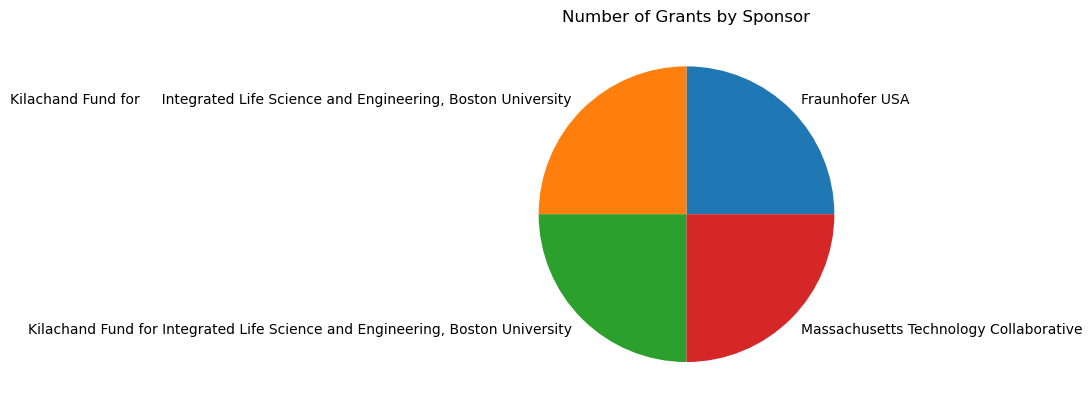

In [33]:
year = 2021
data_year = data[data['Reporting date 1'].dt.year == year]
data_year = data_year[(data_year['Grant type'] == 'BU Grant') | (data_year['Grant type'] == 'Grant')]
sponsor = data_year.groupby(['Sponsor Name'])['Sponsor Name'].count().reset_index(name='count')
plt.pie(sponsor['count'], labels=sponsor['Sponsor Name'])
plt.title('Number of Grants by Sponsor')
plt.show()

7694835.0
3.898550197482109
19.493594765663147
19.493594765663147
57.11426138877869


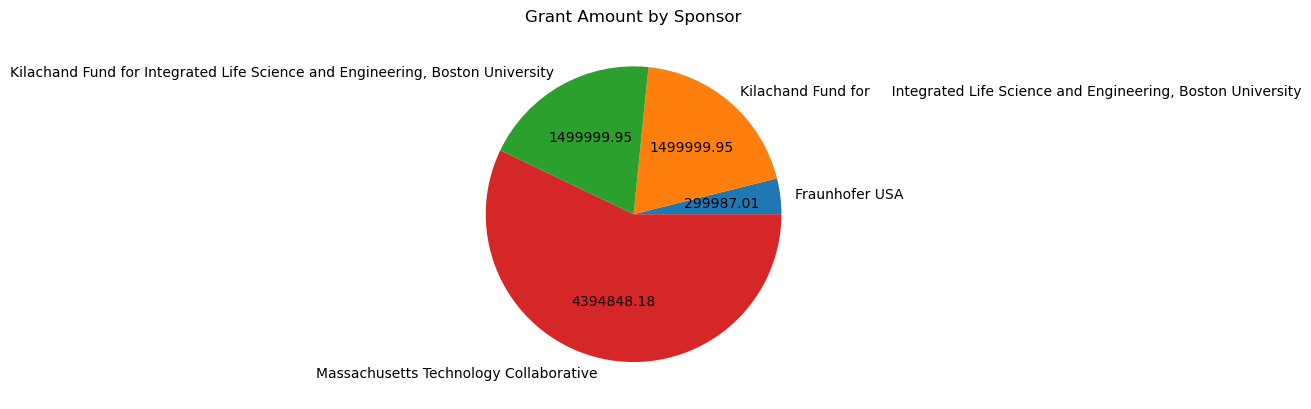

In [34]:
sponsor_sum = data_year.groupby(['Sponsor Name'])['Total Anticipated Amount OR Total Requested Amount amount'].sum().reset_index(name='amount')
total_amount = data_year['Total Anticipated Amount OR Total Requested Amount amount'].sum()

def calc_usd(percentage):
    usd = percentage / 100 * total_amount
    return f'{usd:.2f}'


plt.pie(sponsor_sum['amount'], labels=sponsor_sum['Sponsor Name'], autopct=calc_usd)
plt.title('Grant Amount by Sponsor')
plt.show()